<a href="https://colab.research.google.com/github/anupamtamrakar/Machine-learning/blob/master/Keras_CIFAR100_with_regularizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,Conv2D,Flatten,BatchNormalization
from keras.utils import to_categorical
from keras.regularizers import l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 255s 2us/step


In [126]:
print("Shape of x_train: " + str(x_train.shape))
print("Shape of x_test: " + str(x_test.shape))
print("Shape of y_test: " + str(y_test.shape))
print("Shape of y_train: " + str(y_train.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)
Shape of y_train: (50000, 1)


In [0]:
#x_train = x_train / 255
#x_test = x_test / 255

In [0]:
#x_train = x_train.reshape(50000,3072)
#x_test = x_test.reshape(10000,3072)
one_hot_labels = to_categorical(y_train, num_classes=100)

In [0]:
model = Sequential()
regularizer = l2(0.0001)

In [0]:
model.add(Conv2D(input_shape=x_train[0,:,:,:].shape, filters=96, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters=96, kernel_size=(3,3), strides=2,kernel_regularizer=regularizer))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=192, kernel_size=(3,3),kernel_regularizer=regularizer))
model.add(Activation('relu'))
model.add(Conv2D(filters=192, kernel_size=(3,3), strides=2,kernel_regularizer=regularizer))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(100, activation="softmax"))

In [0]:
model.compile('Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [144]:
model.fit(x=x_train,y=one_hot_labels,batch_size=256,epochs=20,shuffle=True)

Epoch 1/20
50000/50000 [==============================] - 36s 718us/step - loss: 4.1710 - acc: 0.0803
Epoch 2/20
50000/50000 [==============================] - 33s 663us/step - loss: 3.6203 - acc: 0.1556
Epoch 3/20
50000/50000 [==============================] - 33s 658us/step - loss: 3.3026 - acc: 0.2088
Epoch 4/20
50000/50000 [==============================] - 33s 658us/step - loss: 3.0353 - acc: 0.2624
Epoch 5/20
50000/50000 [==============================] - 33s 663us/step - loss: 2.8408 - acc: 0.3014
Epoch 6/20
50000/50000 [==============================] - 33s 659us/step - loss: 2.6812 - acc: 0.3324
Epoch 7/20
50000/50000 [==============================] - 33s 661us/step - loss: 2.5334 - acc: 0.3645
Epoch 8/20
50000/50000 [==============================] - 22s 447us/step - loss: 2.3923 - acc: 0.3938
Epoch 9/20
50000/50000 [==============================] - 18s 354us/step - loss: 2.2889 - acc: 0.4129
Epoch 10/20
50000/50000 [==============================] - 18s 353us/step - loss: 

In [0]:
one_hot_labels_test = to_categorical(y_test, num_classes=100)

In [146]:
model.evaluate(x=x_test,y=one_hot_labels_test,batch_size=128,verbose=1)

10000/10000 [==============================] - 2s 180us/step


[2.516938566970825, 0.4209]

In [0]:
predictions = model.predict(x=x_test,batch_size=32)

In [0]:
preds = np.argmax(predictions,axis=1)
corr = preds == y_test

Acutual: [0], Prediction: 57


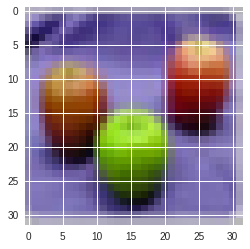

In [149]:
index = 9
plt.imshow(x_test[index])
print("Acutual: {}, Prediction: {}".format(y_test[index],preds[index]))

Correct Predictions
Acutual: [49], Prediction: 49


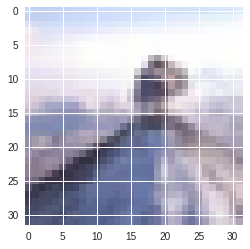

Acutual: [33], Prediction: 33


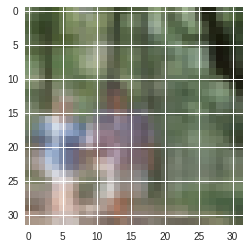

Acutual: [51], Prediction: 51


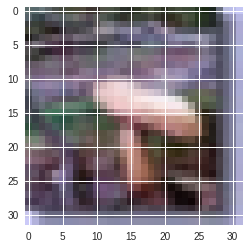

Acutual: [71], Prediction: 71


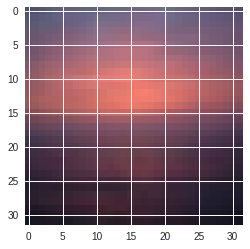

Acutual: [75], Prediction: 75


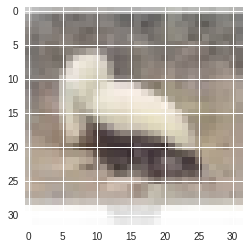

In [150]:
print("Correct Predictions")
count = 0;
for i in range(len(x_test)):
  if(preds[i]==y_test[i] and count != 5):
    plt.imshow(x_test[i])
    count +=1
    print("Acutual: {}, Prediction: {}".format(y_test[i],preds[i]))
    plt.show()

In [151]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 96)        2688      
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 96)        83040     
_________________________________________________________________
activation_18 (Activation)   (None, 14, 14, 96)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 192)       166080    
_________________________________________________________________
activation_19 (Activation)   (None, 12, 12, 192)       0         
__________